<a href="https://colab.research.google.com/github/claredavies/DataScienceCoursework/blob/master/Assignment1DataScrapingNewsArticles/DataScienceClareDaviesProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""DataScienceAssignment1ClareDavies.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1kFmvIVs1vKXTBOYjngLgzs9IJEnn46uP
"""

# Commented out IPython magic to ensure Python compatibility.
##################################################################
#Set up Selenium & Chrome Driver
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
driver = webdriver.Chrome('chromedriver',options=chrome_options)

##################################################################
#Set up BeautifulSoup && Panda
import requests
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import bleach
# %matplotlib inline
import time
from selenium.common.exceptions import TimeoutException
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:15 http://archive.ubuntu.com/ubun

In [ ]:
##################################################################
#LOAD ARTICLES VIA selenium 
years = ["2019", "2020"]

titles = []
dates = []
authors = []
links = []
year_article = []


###############################################################
#Selenium Clicking

def scroll():        
  length_page = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var length_page=document.body.scrollHeight;return length_page;")
  match=False
  while(match==False):
          last_count = length_page
          time.sleep(1.5)
          length_page = driver.execute_script("window.scrollTo(0, document.body.scrollHeight);var length_page=document.body.scrollHeight;return length_page;")
          if last_count==length_page:
              match=True
        
def load_articles_button():
  no_article_old = 0
  no_article_new = 0
  while True:
          try:
            WebDriverWait(driver, 1).until(EC.element_to_be_clickable((By.XPATH, "//button[contains(text(),'Show More')]"))).click()
            scroll()
            result = driver.find_elements_by_xpath("//li[contains(@class, 'css-1l4w6pd')]")
            no_article_new = len(result)
            if no_article_new > no_article_old:
              no_article_old = no_article_new 
            else:
              break
          except TimeoutException as ex:
            break            

###############################################################
#Data Scraping articles 
def load_articles_beautiful_soup(year):
  articles_selector = soup.find_all('li', class_='css-1l4w6pd')

  for tag in articles_selector:
      title = tag.find("h4", {"class": "css-2fgx4k"})
      date = tag.find("span", {"class": "css-17ubb9w"})
      author = tag.find("p", {"class": "css-15w69y9"})
      link_search = tag.find('a', href=True)
      link = link_search['href']
      link = 'https://www.nytimes.com/' + link
      
      if title is not None and date is not None and author is not None and link is not None:
        titles.append(title.string)
        dates.append(date.string)
        authors.append(author.string)
        links.append(link)
        year_article.append(year)

###############################################################
#Part 1 & 2 - Data Scraping & Processing

for year in years:
  driver.get('https://www.nytimes.com/search?dropmab=true&endDate='+ year + '0114&query=&sort=best&startDate=' + year + '0101')
  print("Starting loading articles  for year  " + str(year) + "  (this will take time)")
  load_articles_button()
  print("Finished loading articles  for year  " + str(year) + "  (this will take time)")
  soup = BeautifulSoup(driver.page_source, 'lxml')
  load_articles_beautiful_soup(year)
print("Finished loading all articles from webpage")


Starting loading articles  for year  2019  (this will take time)
Finished loading articles  for year  2019  (this will take time)
Starting loading articles  for year  2020  (this will take time)
Finished loading articles  for year  2020  (this will take time)
Finished loading all articles from webpage


0       With New Voting Laws, Democrats Flex Newfound ...
1       Airports, Brexit, Los Angeles: Your Monday Eve...
2       Closed Terminal Checkpoint at Houston Airport ...
3       Executive Shuffle at NBC Hints at C.E.O. Succe...
4       Trump Defends Trade Policies to Farmers Feelin...
                              ...                        
1835    Judge Signals Approval of U.S.C.’s $215 Millio...
1836       The Crucial Lessons From Australia’s Wildfires
1837                  Some NATO Troops Begin Leaving Iraq
1838    A One-Word Accusation Swirls Around Trump’s De...
1839    Days After Suleimani Killing, Trump Campaign P...
Name: Title, Length: 1840, dtype: object


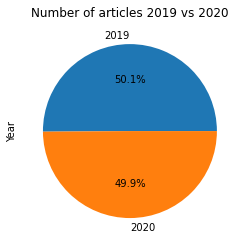

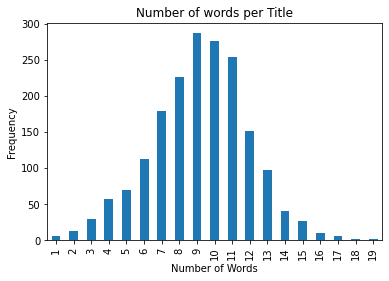

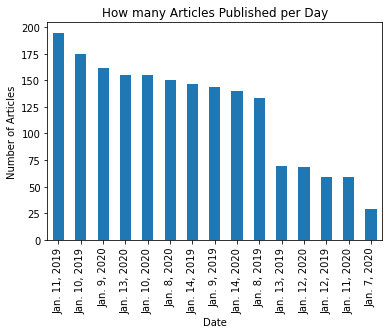

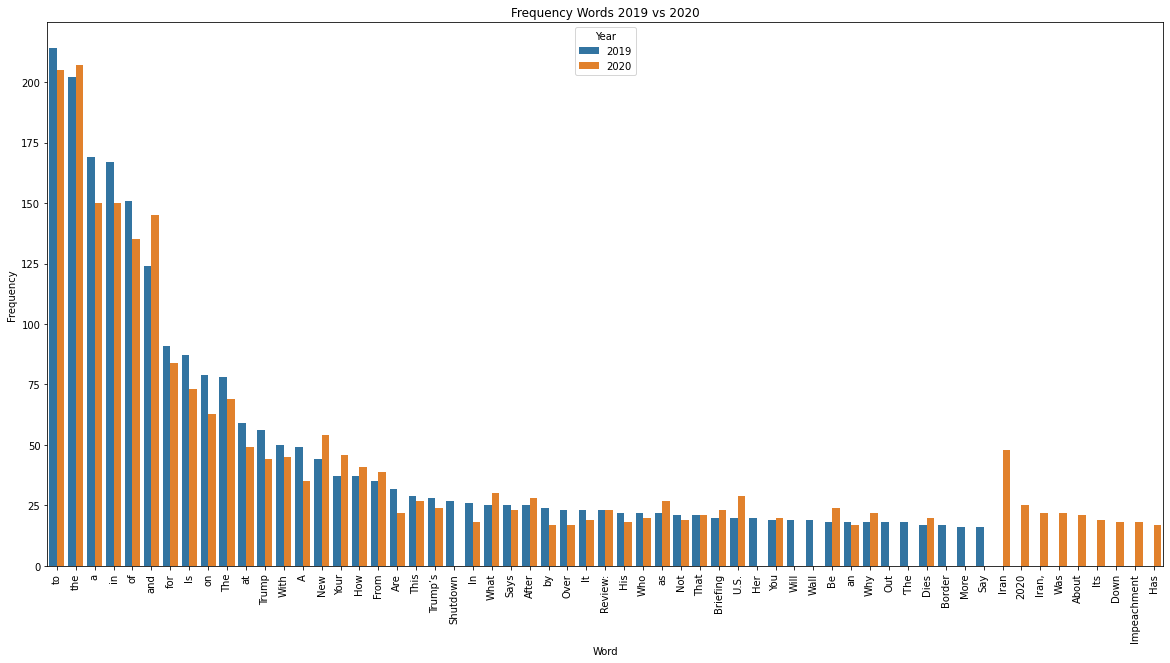

Available Topics:  
to ,the ,a ,in ,of ,and ,for ,Is ,on ,The ,at ,Trump ,With ,A ,New ,Your ,How ,From ,Are ,This ,Trump’s ,Shutdown ,In ,What ,Says ,After ,by ,Over ,It ,Review: ,His ,Who ,as ,Not ,That ,Briefing ,U.S. ,Her ,You ,Will ,Wall ,Be ,an ,Why ,Out ,‘The ,Dies ,Border ,More ,Say ,the ,to ,a ,in ,and ,of ,for ,Is ,The ,on ,New ,at ,Iran ,Your ,With ,Trump ,How ,From ,A ,What ,U.S. ,After ,This ,as ,2020 ,Be ,Trump’s ,Briefing ,Says ,Why ,Iran, ,Are ,Was ,About ,Dies ,Who ,You ,Its ,Not ,It ,In ,Down ,Impeachment ,His ,Has ,an ,by ,Over ,

Enter Topic Name:  New


|      | Title                                                                                           |
|-----:|:------------------------------------------------------------------------------------------------|
|    0 | With New Voting Laws, Democrats Flex Newfound Power in New York                                 |
|   19 | What if You Could Literally Talk to The New York Times?                                  

In [ ]:
###############################################################
#Step 3 – Exploratory data analysis (EDA)
df = pd.DataFrame(list(zip(titles, dates, authors, links,year_article)),columns =["Title", "Date", "Author", "Link", "Year"])  

# print(df["Date"].describe().to_markdown())

# compare number of articles 2019 vs 2020
fig, ax = plt.subplots()
df['Year'].value_counts().plot(ax=ax, kind='pie',autopct='%1.1f%%').set_title("Number of articles 2019 vs 2020")

print(df['Title'])
# count number of words in title
count_no_words_title = df['Title'].str.count(' ').add(1).value_counts(sort=False)
fig, ax_words = plt.subplots()
# df_number_words_title =pd.DataFrame({'x':count_no_words_title, 'y':count_no_words_title.index})
ax_words = count_no_words_title.plot.bar()
ax_words.set_title("Number of words per Title")
ax_words.set(xlabel='Number of Words', ylabel='Frequency')

# count day with most articles
fig, ax_day = plt.subplots()
ax_day.set_xlabel("Date")
ax_day.set_ylabel("Number of Articles")
df['Date'].value_counts().plot(ax=ax_day, kind='bar').set_title("How many Articles Published per Day")


plt.show()

###############################################################
#Put Data Into Topics and then compare 2020 to 2019

title_2019 = df[df['Year'].str.contains("2019")]
title_2020 = df[df['Year'].str.contains("2020")]

most_common_words_2019 = Counter(" ".join(title_2019['Title']).split()).most_common(50)
most_common_words_2020 = Counter(" ".join(title_2020['Title']).split()).most_common(50)

# Put topic info into Panda
df_words_2019 = pd.DataFrame.from_records(most_common_words_2019, columns=['Word','Frequency'])
df_words_2020 = pd.DataFrame.from_records(most_common_words_2020, columns=['Word','Frequency'])

# PLOT 2019 vs 2020 frequency words
df_words_2019['Year']=2019
df_words_2020['Year']=2020
df_words_combined_years=pd.concat([df_words_2019,df_words_2020])

sns.barplot(x='Word',y='Frequency',data=df_words_combined_years,hue='Year').set_title("Frequency Words 2019 vs 2020")
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xticks(rotation=90)
plt.show()

# Combined most common words (removed duplicated)
most_common_words = list(most_common_words_2019)
most_common_words.extend(x for x in most_common_words_2020 if x not in most_common_words)

# Plot histogram using matplotlib bar().
###############################################################
# Step 4 – Interaction with the user
# • User inputs a topic name e.g. use titles
# • User gets the list of relevant news articles (their ID, and title)
# • User picks one of the IDs
# • The code returns the URL to the news.

# List available topics
print("Available Topics:  ")
for item in most_common_words:
        print(item[0],end=' ,')
print("\n")

# Get input user
topic_name = input("Enter Topic Name:  ")
while True:
  if any(topic_name in s for s in most_common_words):
    break
  else:
    print("Entered INVALID topic please try again")
    topic_name = input("Enter Topic Name:  ")

print("\n")
result_topic = df[df['Title'].str.contains(topic_name)]['Title']
print(result_topic.to_markdown())

while True:
  chosen_id = input("Enter Chosen ID:  " )
  try:
    chosen_id_int = int(chosen_id)
    print("\n")
    result_url = df._slice(slice((chosen_id_int), (chosen_id_int+1)))['Link']
    if result_url.values.size > 0:
      break
    else:
      print("ID out of range")
  except:
    print("Invalid Id chosen")

print("\n")
print(result_url.to_markdown())